In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [3]:
import keras
print(tf.__version__)

2.3.1


In [4]:
import os
from os import mkdir
import shutil
from shutil import copyfile 
import image
import PIL

In [5]:




# The path to the directory where the original
# dataset was uncompressed


#original_dataset_dir = '/content/drive/My Drive/train/train'

original_dataset_dir='D:\\0-Fall-2020\\Machine learning\\Imagenet datasets\\main-dataset'

# The directory where we will
# store our smaller dataset


#base_dir = '/content/drive/My Drive/new_sets'

base_dir = 'D:\\0-Fall-2020\\Machine learning\\Imagenet datasets\\new_sets'

#os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# Directory with our training german pictures
train_german_dir = os.path.join(train_dir, 'german')
#os.mkdir(train_german_dir)

# Directory with our training husky pictures
train_husky_dir = os.path.join(train_dir, 'husky')
#os.mkdir(train_husky_dir)

# Directory with our validation german pictures
validation_german_dir = os.path.join(validation_dir, 'german')
#os.mkdir(validation_german_dir)

# Directory with our validation husky pictures
validation_husky_dir = os.path.join(validation_dir, 'husky')
#os.mkdir(validation_husky_dir)

# Directory with our validation german pictures
test_german_dir = os.path.join(test_dir, 'german')
#os.mkdir(test_german_dir)

# Directory with our validation husky pictures
test_husky_dir = os.path.join(test_dir, 'husky')
#os.mkdir(test_husky_dir)
'''
# Copy first 1200 german images to train_german_dir

fnames = ['german ({}).jpeg'.format(i) for i in range(1,1200)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_german_dir, fname)
    copyfile(src, dst)

# Copy next 270 german images to validation_german_dir
fnames = ['german ({}).jpeg'.format(i) for i in range(1200, 1470)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_german_dir, fname)
    copyfile(src, dst)

# Copy next 270 german images to test_german_dir
fnames = ['german ({}).jpeg'.format(i) for i in range(1470, 1741)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_german_dir, fname)
    copyfile(src, dst)

# Copy first 1100 husky images to train_husky_dir
fnames = ['husky ({}).jpeg'.format(i) for i in range(1,1100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_husky_dir, fname)
    copyfile(src, dst)

# Copy next 221 husky images to validation_husky_dir
fnames = ['husky ({}).jpeg'.format(i) for i in range(1100, 1321)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_husky_dir, fname)
    copyfile(src, dst)

# Copy next 221 husky images to test_husky_dir
fnames = ['husky ({}).jpeg'.format(i) for i in range(1321, 1542)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_husky_dir, fname)
    copyfile(src, dst)

'''    

"\n# Copy first 1200 german images to train_german_dir\n\nfnames = ['german ({}).jpeg'.format(i) for i in range(1,1200)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(train_german_dir, fname)\n    copyfile(src, dst)\n\n# Copy next 270 german images to validation_german_dir\nfnames = ['german ({}).jpeg'.format(i) for i in range(1200, 1470)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(validation_german_dir, fname)\n    copyfile(src, dst)\n\n# Copy next 270 german images to test_german_dir\nfnames = ['german ({}).jpeg'.format(i) for i in range(1470, 1741)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(test_german_dir, fname)\n    copyfile(src, dst)\n\n# Copy first 1100 husky images to train_husky_dir\nfnames = ['husky ({}).jpeg'.format(i) for i in range(1,1100)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, f

In [6]:
print('number german images for  training :', len(os.listdir(train_german_dir)))
print('number husky images for training :', len(os.listdir(train_husky_dir)))
print('number german images for validation :', len(os.listdir(validation_german_dir)))
print('number husky images for validation :', len(os.listdir(validation_husky_dir)))
print('number german images for test :', len(os.listdir(test_german_dir)))
print('number husky  for images test :', len(os.listdir(test_husky_dir)))

number german images for  training : 1200
number husky images for training : 1100
number german images for validation : 270
number husky images for validation : 221
number german images for test : 270
number husky  for images test : 220


In [21]:
#Standardize the data
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train = ImageDataGenerator(rescale=1./255)
val = ImageDataGenerator(rescale=1./255)

train_generator = train.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = val.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 2300 images belonging to 2 classes.
Found 491 images belonging to 2 classes.


In [22]:
#build model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [23]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [35]:
!pip install pillow

In [15]:
!pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [24]:
#fit model 
import PIL
#history = model.fit_generator(
history = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=30)

Epoch 1/20
50/50 [==============================] - 57s 1s/step - loss: 0.6689 - acc: 0.6050 - val_loss: 0.6388 - val_acc: 0.5967
Epoch 2/20
50/50 [==============================] - 60s 1s/step - loss: 0.5932 - acc: 0.6970 - val_loss: 0.6565 - val_acc: 0.6267
Epoch 3/20
50/50 [==============================] - 54s 1s/step - loss: 0.5711 - acc: 0.7140 - val_loss: 0.5632 - val_acc: 0.7233
Epoch 4/20
50/50 [==============================] - 58s 1s/step - loss: 0.5599 - acc: 0.7200 - val_loss: 0.5427 - val_acc: 0.7467
Epoch 5/20
50/50 [==============================] - 55s 1s/step - loss: 0.5388 - acc: 0.7280 - val_loss: 0.6377 - val_acc: 0.6667
Epoch 6/20
50/50 [==============================] - 53s 1s/step - loss: 0.5343 - acc: 0.7390 - val_loss: 0.5235 - val_acc: 0.7467
Epoch 7/20
50/50 [==============================] - 56s 1s/step - loss: 0.5450 - acc: 0.7420 - val_loss: 0.5165 - val_acc: 0.7667
Epoch 8/20
50/50 [==============================] - 62s 1s/step - loss: 0.5059 - acc: 0.75

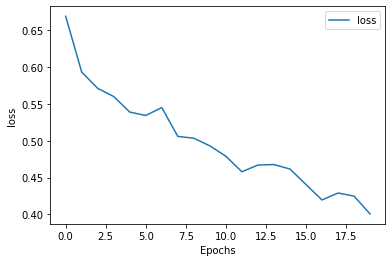

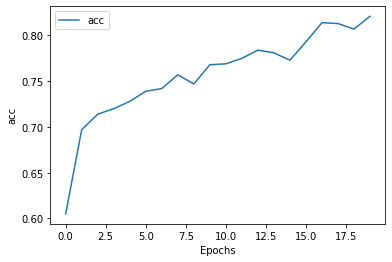

In [25]:
import matplotlib.pyplot as plt
def plot_graphs(fname, history, metric):
    plt.plot(history.history[metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()
    plt.close()

plot_graphs("loss", history, 'loss')
plot_graphs("acc", history, 'acc')

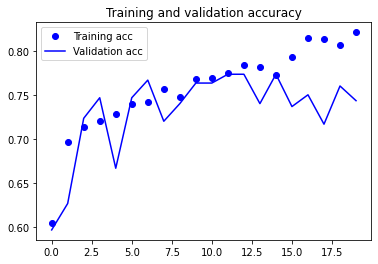

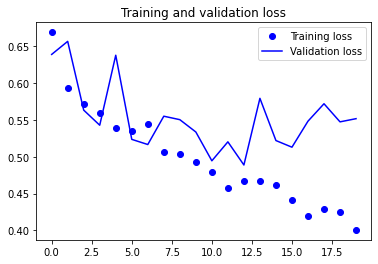

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
test_generator = val.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=12,
        class_mode='binary')

model.evaluate(test_generator) 


Found 490 images belonging to 2 classes.
41/41 [==============================] - 9s 211ms/step - loss: 0.5378 - acc: 0.7551 3s - loss: 0.5


[0.5377910137176514, 0.7551020383834839]